In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
X = df[['radius_mean', 'concave points_mean']]
y = df['diagnosis']
y = y.map({'M':1, 'B':0})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


In [ ]:
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


[Text(0.5120967741935484, 0.9285714285714286, 'X[1] <= 0.049\ngini = 0.468\nsamples = 455\nvalue = [285, 170]'),
 Text(0.24193548387096775, 0.7857142857142857, 'X[0] <= 15.025\ngini = 0.091\nsamples = 273\nvalue = [260, 13]'),
 Text(0.06451612903225806, 0.6428571428571429, 'X[1] <= 0.031\ngini = 0.038\nsamples = 258\nvalue = [253, 5]'),
 Text(0.03225806451612903, 0.5, 'gini = 0.0\nsamples = 201\nvalue = [201, 0]'),
 Text(0.0967741935483871, 0.5, 'X[1] <= 0.031\ngini = 0.16\nsamples = 57\nvalue = [52, 5]'),
 Text(0.06451612903225806, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12903225806451613, 0.35714285714285715, 'X[1] <= 0.045\ngini = 0.133\nsamples = 56\nvalue = [52, 4]'),
 Text(0.06451612903225806, 0.21428571428571427, 'X[1] <= 0.036\ngini = 0.085\nsamples = 45\nvalue = [43, 2]'),
 Text(0.03225806451612903, 0.07142857142857142, 'gini = 0.18\nsamples = 20\nvalue = [18, 2]'),
 Text(0.0967741935483871, 0.07142857142857142, 'gini = 0.0\nsamples = 25\nvalue

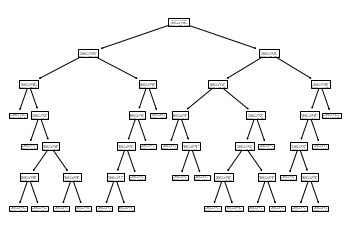

In [ ]:
from sklearn import tree
tree.plot_tree(dt)